In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Indian_movies.csv")

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Rank,Movie Names,Links,Rating,Year,Duration_of_movie,Genere,Description
0,0,1,Ramayana: The Legend of Prince Rama,https://www.imdb.com//title/tt0259534/?ref_=fe...,9.2,1993,PG,"Animation,Action,Adventure,Back to top",An anime adaptation of the Hindu epic the Rama...
1,1,2,Rocketry: The Nambi Effect,https://www.imdb.com//title/tt9263550/?ref_=fe...,8.7,2022,2h 37m,"Biography,Drama,Back to top",Based on the life of Indian Space Research Org...
2,2,3,Nayakan,https://www.imdb.com//title/tt0093603/?ref_=fe...,8.6,1987,Not Rated,"Crime,Drama,Back to top",A common man's struggles against a corrupt pol...
3,3,4,Gol Maal,https://www.imdb.com//title/tt0079221/?ref_=fe...,8.5,1979,Not Rated,"Comedy,Romance,Back to top",A man's simple lie to secure his job escalates...
4,4,5,Anbe Sivam,https://www.imdb.com//title/tt0367495/?ref_=fe...,8.6,2003,Not Rated,"Adventure,Comedy,Drama,Back to top","Two men, one young and arrogant, the other dam..."


In [7]:
#### Next, we'll clean and preprocess the text data:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

# Define a function to clean and preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into text
    clean_text = ' '.join(filtered_tokens)
    return clean_text

# Apply preprocessing to movie descriptions
data['Clean_Description'] = data['Description'].apply(preprocess_text)

# Display the cleaned descriptions
print(data['Clean_Description'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0    anime adaptation hindu epic ramayana lord ram ...
1    based life indian space research organization ...
2    common mans struggles corrupt police force put...
3    mans simple lie secure job escalates complex l...
4    two men one young arrogant damaged physically ...
Name: Clean_Description, dtype: object


In [ ]:
### Now, let's proceed with network analysis:

In [8]:
!pip install networkx

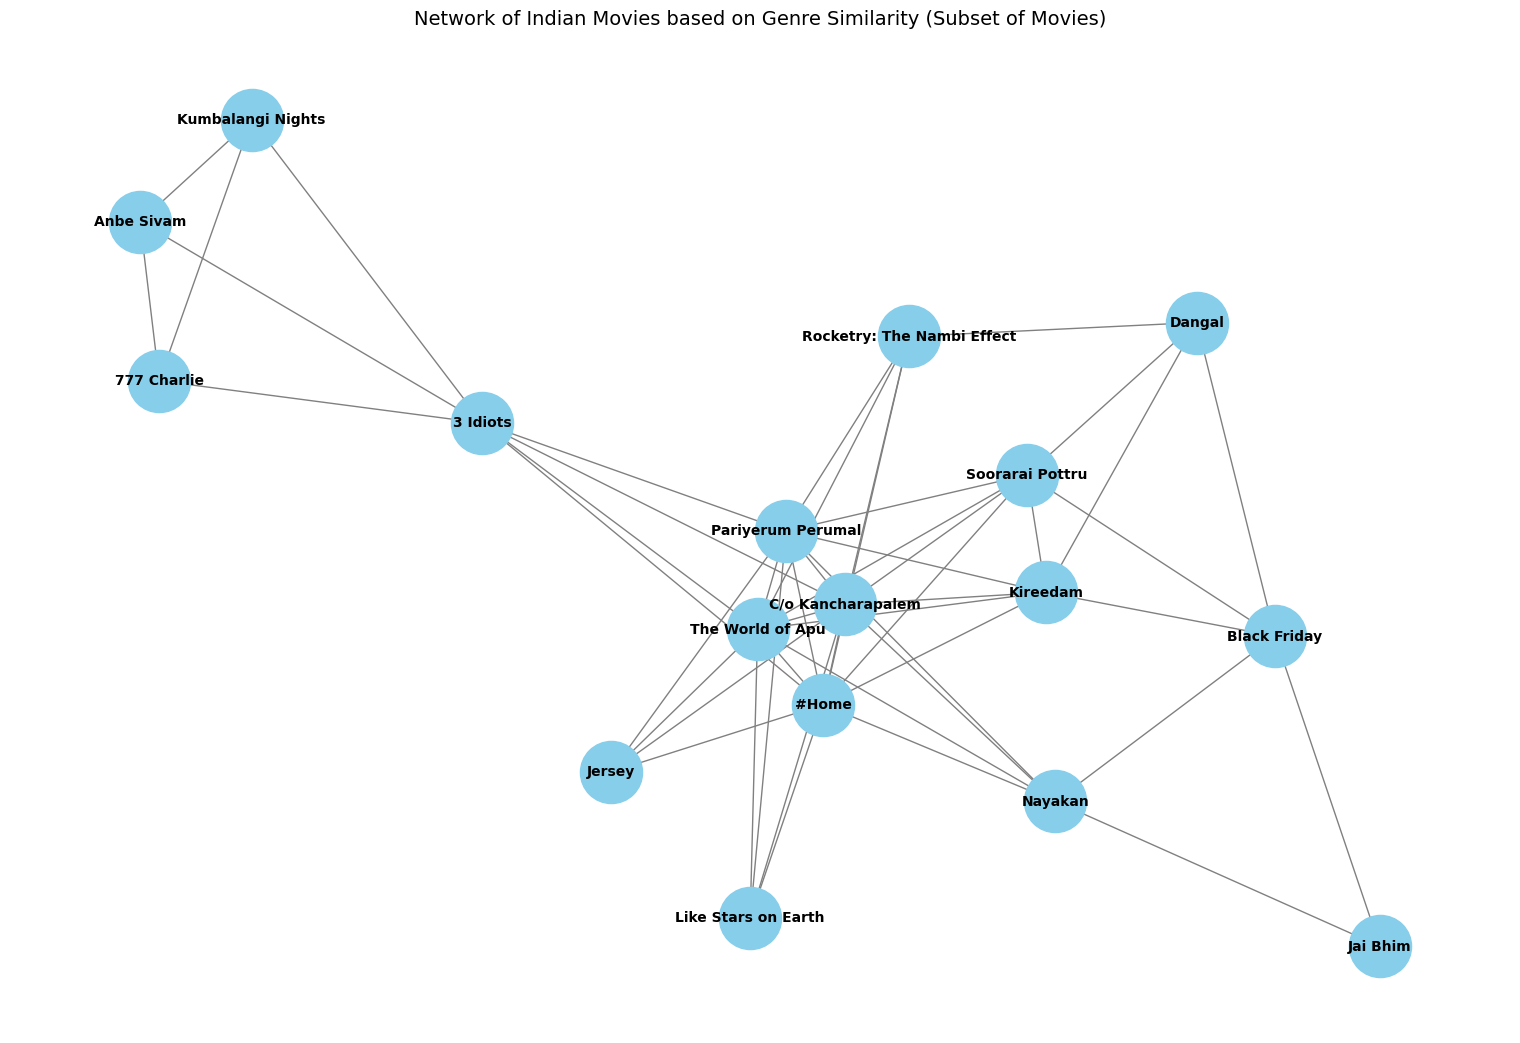

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Select a subset of movies (e.g., first 20 rows)
subset_data = data.iloc[:20]

# Create a graph
G = nx.Graph()

# Add nodes (movies) to the graph
for index, row in subset_data.iterrows():
    G.add_node(row['Movie Names'], rating=row['Rating'], year=row['Year'], genre=row['Genere'])

# Add edges between movies based on similarity metrics (e.g., Jaccard similarity)
# For demonstration purposes, let's add edges based on the same genre
for i in range(len(subset_data)):
    for j in range(i+1, len(subset_data)):
        genres_i = set(subset_data.iloc[i]['Genere'].split(','))
        genres_j = set(subset_data.iloc[j]['Genere'].split(','))
        similarity = len(genres_i.intersection(genres_j)) / len(genres_i.union(genres_j))
        if similarity > 0.5:
            G.add_edge(subset_data.iloc[i]['Movie Names'], subset_data.iloc[j]['Movie Names'], weight=similarity)

# Filter out nodes with degree less than a threshold (e.g., 2)
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(nodes_to_remove)

# Visualize the network
plt.figure(figsize=(15, 10))  # Adjust the figure size for better visibility
pos = nx.spring_layout(G, k=0.3)  # Adjust the spring layout parameter for better spacing
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.title('Network of Indian Movies based on Genre Similarity (Subset of Movies)', fontsize=14)
plt.show()

In [ ]:
## Moving on to text processing:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data into document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Clean_Description'])

# Apply Latent Dirichlet Allocation (LDA)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display topics and associated words
for index, topic in enumerate(lda_model.components_):
    print(f"Topic {index+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['fathers', 'girl', 'find', 'three', 'read', 'man', 'life', 'young', 'one', 'indian']
Topic 2:
['love', 'scientist', 'college', 'girl', 'life', 'indian', 'two', 'man', 'read', 'young']
Topic 3:
['gangster', 'young', 'two', 'woman', 'story', 'family', 'love', 'life', 'read', 'man']
Topic 4:
['man', 'one', 'love', 'young', 'struggles', 'fight', 'becomes', 'gets', 'village', 'read']
Topic 5:
['man', 'college', 'lives', 'life', 'day', 'story', 'officer', 'read', 'case', 'police']


In [13]:
### For Named Entity Recognition (NER), we can use libraries like spaCy:

In [14]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [15]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 5.9 MB/s eta 0:00:03
     - -------------------------------------- 0.6/12.8 MB 6.4 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.8 MB 6.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.7/12.8 MB 7.3 MB/s eta 0:00:02
     ------ --------------------------------- 2.0/12.8 MB 7.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 6.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 5.7 MB/s eta 0:00:02
     ----------- ---------------------------- 3.8/12.8 MB 6.5 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 6.7 MB/s eta 0:00:02
     -------------- ------------------------- 4.6/12.8 MB 6.8 MB/s eta 0:00:02
     --------------- ------------------------ 4.9/12.8 MB 6.8 MB/s eta 0:00:02
     --------------- ------------------------ 5.1/12.8 MB 6

In [16]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Define a function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE']]
    return entities

# Apply NER to movie descriptions
data['Entities'] = data['Description'].apply(extract_entities)

# Display extracted entities last five rows
print(data['Entities'].tail())

245                                        [India]
246                                             []
247    [Kashmiri, Pakistan, the Indo-Pakistan War]
248                                             []
249                     [Dia, Rohith, Adi, Rohith]
Name: Entities, dtype: object


In [17]:
### For modeling and evaluation, we can train a simple regression model to predict IMDb ratings:

In [18]:
!pip install plotly

In [19]:
!pip install -U kaleido

Linear Regression: 0.0892
Random Forest Regressor: 0.0912
Gradient Boosting Regressor: 0.0877


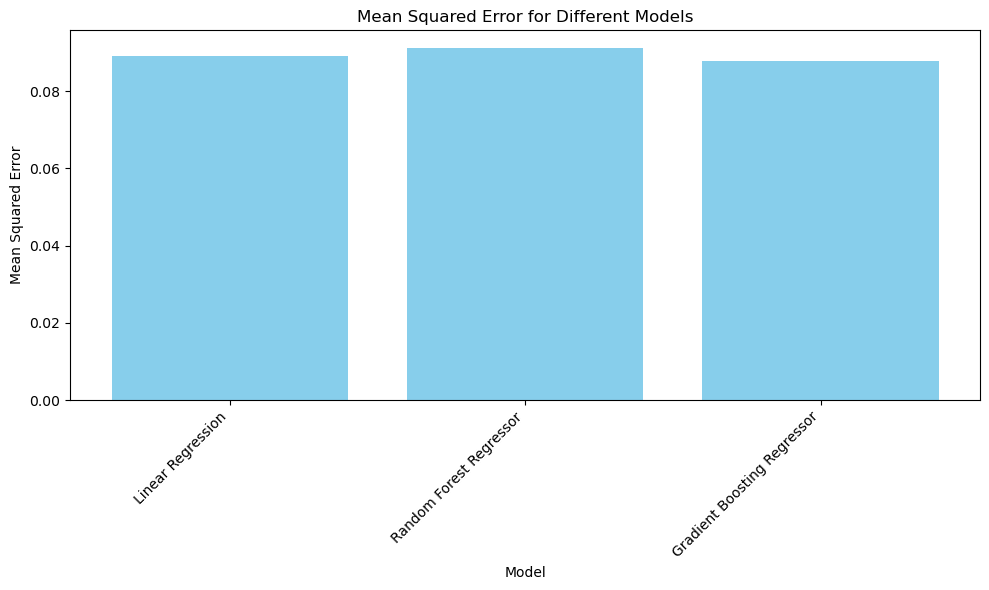

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Rating'], test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results.items(), columns=['Model', 'Mean Squared Error'])

# Plot the mean squared error for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Print mean squared error for each model
for index, row in results_df.iterrows():
    print(f"{row['Model']}: {row['Mean Squared Error']:.4f}")

plt.show()